# LABORATORIO 1 (REGRESIÓN LINEAL)

NOMBRE: Jheison René Gutiérrez Gómez

CORREO: jheison.gutierrez01@usa.edu.co

## OBJETIVO DEL LABORATORIO

Predecir el saldo promedio que los clientes tendrán en su tarjeta de crédito (Balance) mediante un modelo de regresión lineal, siguiendo los pasos que se detallan a continuación:


1-Realizar análisis descriptivo

2-Realizar análisis exploratorio

3-Construir pipeline de preprocesamiento

4-Agregar al pipeline de preprocesamiento el estimador. El modelo generado debe contener el pipeline de preprocesamiento y el estimador

5-Dividir datos en train-test

6-Evaluar el modelo generado

7-Identifique las variables que más contribuyen al modelo

### Etiquetas de las variables

Income: Ingresos en miles de dólares

Limit: Límite de crédito del cliente

Rating: Puntaje de crédito del cliente

Cards: Número de tarjetas de crédito

Age: Edad

Education: Número de años de educación formal

Own: Propietario de al menos una casa

Student: Actualmente es estudiante

Married: Actualmente casado

Region: (East, West, o South)

Balance: Deuda promedio en la tarjeta de crédito

# 1-) Obtener los datos del repositorio de GitHub

In [51]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Linear%20Regression/Credit.csv'
df = pd.read_csv(url)

display(df.head())

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


#2-) Análisis descriptivo ##

### Determinar el tipo de variable correspondiente a cada predictor.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


### Realizar un análisis descriptivo de las variables numéricas.

In [53]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Display descriptive statistics for numerical columns
display(df[numerical_cols].describe())

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


### Visualizar la distribución de las variables numéricas mediante histogramas para analizar su comportamiento.

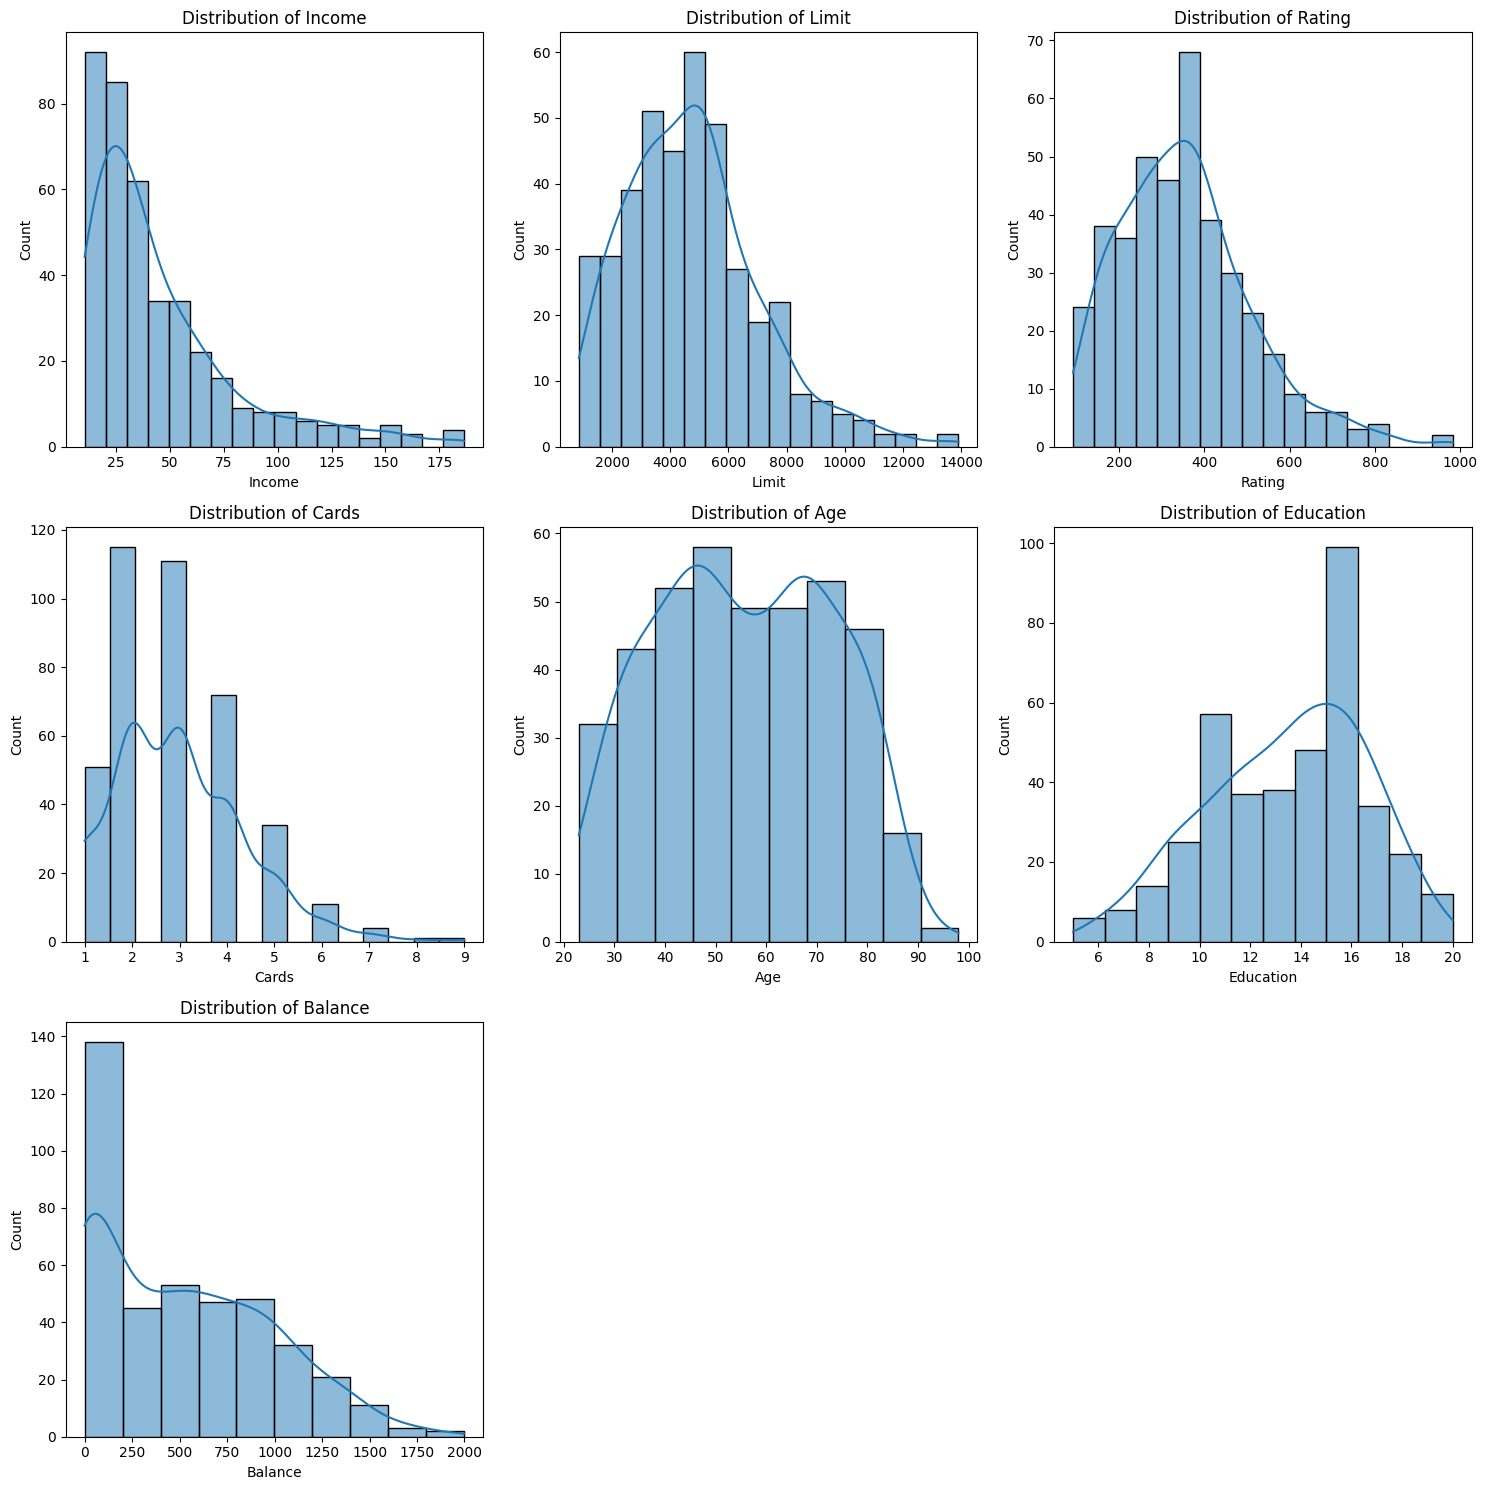

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns (excluding the target variable 'Balance' if you don't want it in the bar plots)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# If you want to exclude 'Balance', uncomment the next line:
# numerical_cols.remove('Balance')


# Determine the number of rows and columns for subplots
n_cols = 3  # You can adjust this number for moderate size
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5)) # Adjust figsize for moderate size
axes = axes.flatten() # Flatten the axes array for easy iteration

# Plot bar plots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True) # Using histplot which is more suitable for numerical distribution
    axes[i].set_title(f'Distribution of {col}')


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Realizar un análisis descriptivo de las variables categóricas.

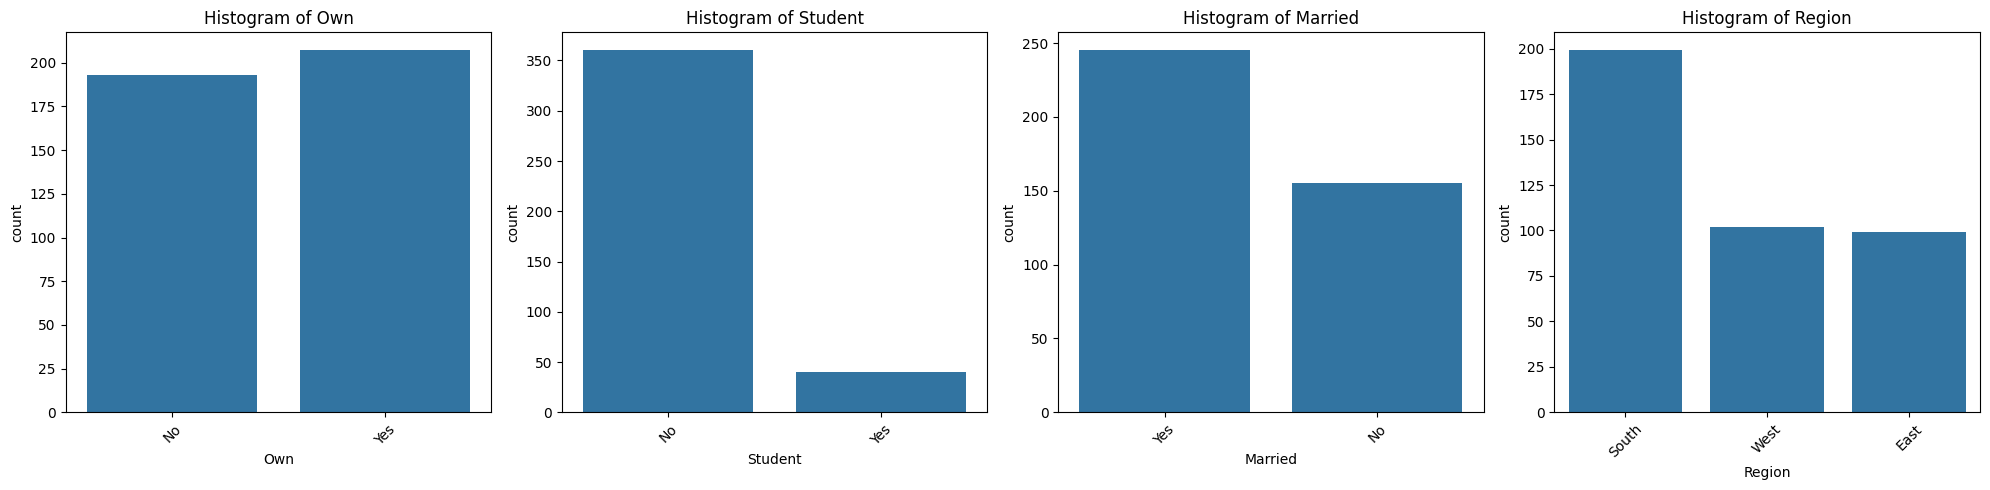

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Determine the number of columns for subplots (equal to the number of categorical variables)
n_cols = len(categorical_cols)
n_rows = 1 # Single row

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, 5)) # Adjust figsize for a single row
# If there's only one categorical variable, axes will not be a flattened array, so handle this case
if n_cols == 1:
    axes = [axes]
else:
    axes = axes.flatten() # Flatten the axes array for easy iteration

# Plot histograms for each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

# 3-) Análisis exploratorio #

### Numérica - Numérica ##

### Construir la matriz de correlación entre las variables numéricas.

In [56]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Display the correlation matrix
display(correlation_matrix)

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


Como se evidencia en la matriz de correlación, las variables numéricas que presentan una relación lineal con la variable objetivo Balance son Limit, Rating e Income. Aunque Income tiene un coeficiente menor que las otras dos.


### Generar una gráfica de correlación para visualizar las relaciones entre las variables numéricas visualmente, como complemento de la matriz de correlación.

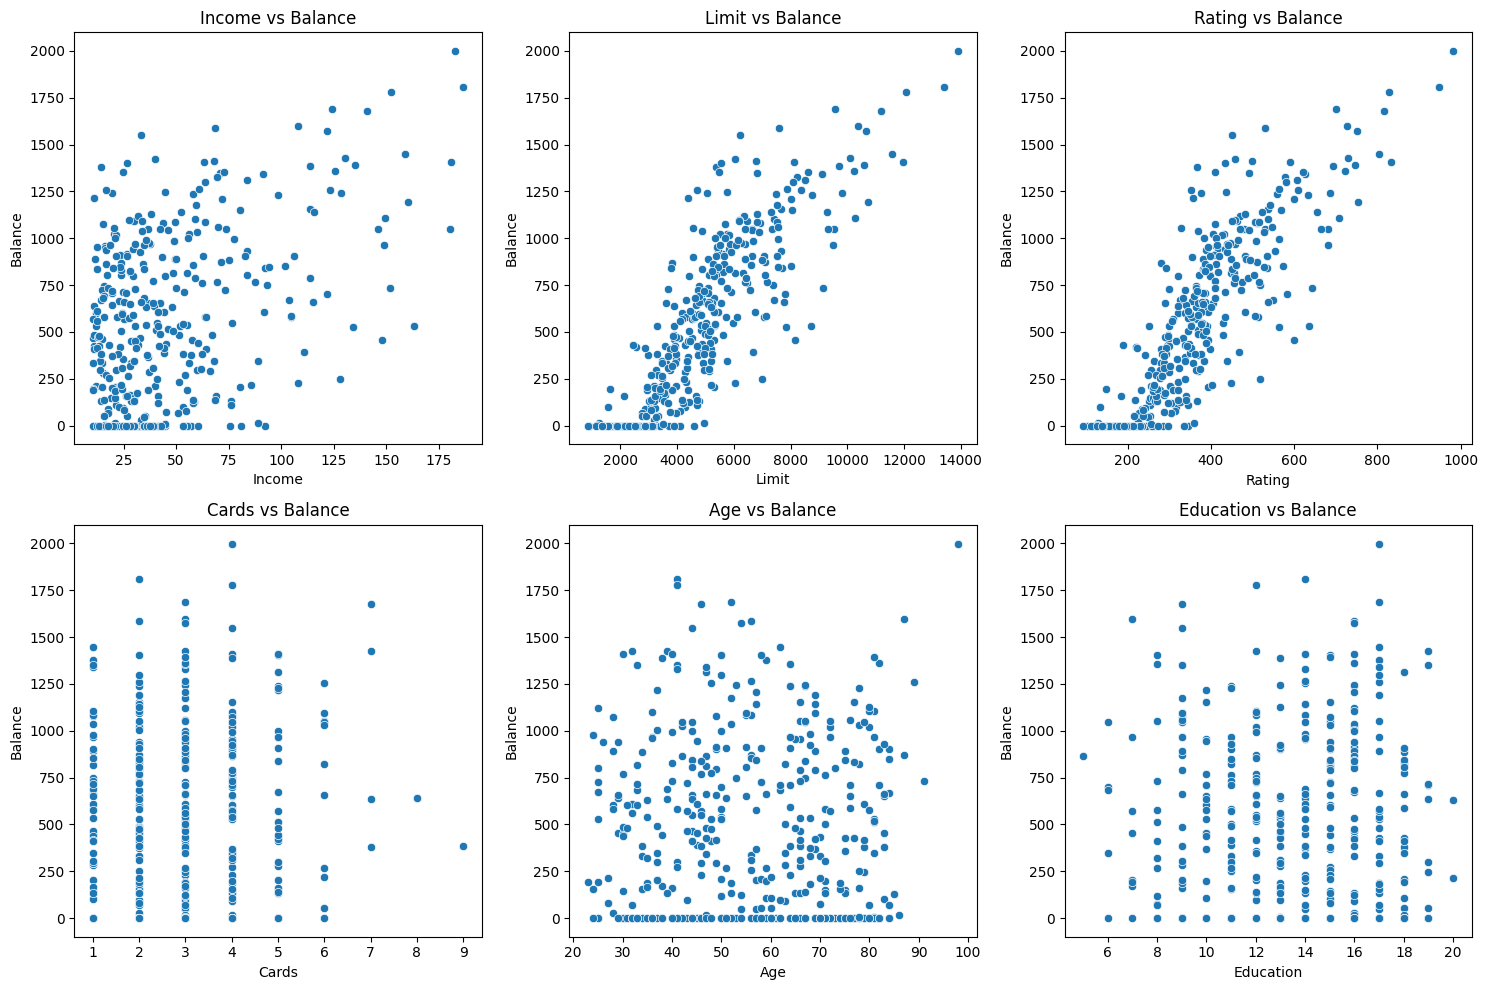

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns (excluding 'Balance')
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Balance')

# Determine the number of columns for subplots
n_cols = 3  # Adjust as needed for moderate size
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols # Calculate rows based on the number of columns

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5)) # Adjust figsize for moderate size
axes = axes.flatten() # Flatten the axes array for easy iteration

# Plot scatter plots for each numerical column against 'Balance'
for i, col in enumerate(numerical_cols):
    sns.scatterplot(data=df, x=col, y='Balance', ax=axes[i])
    axes[i].set_title(f'{col} vs Balance')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Análisis exploratorio : Numérica - categórica

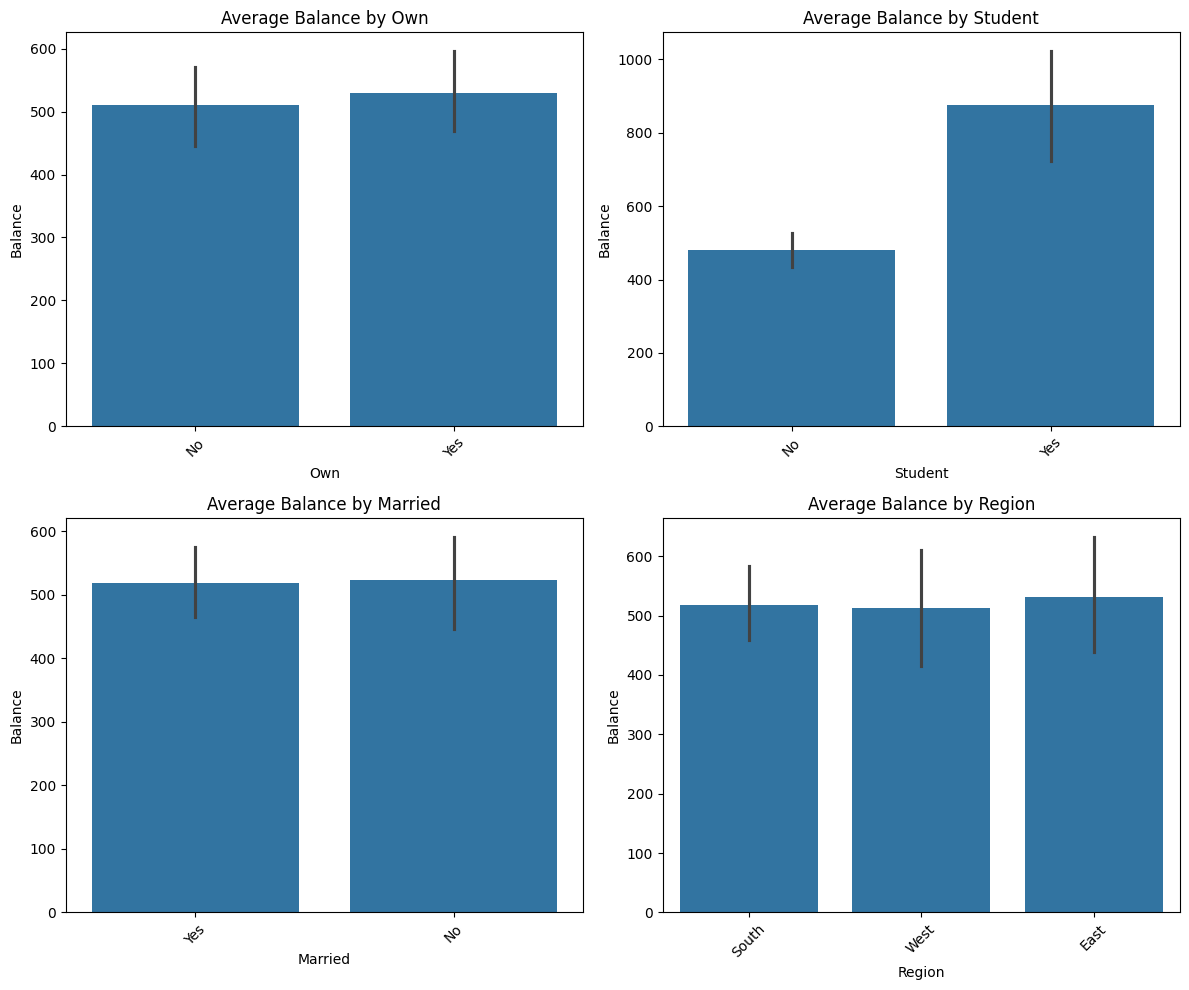

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Determine the number of columns for subplots
n_cols = 2 # Adjust this number as needed
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5)) # Adjust figsize as needed
axes = axes.flatten() # Flatten the axes array for easy iteration

# Plot bar plots (average Balance) for each categorical column
for i, col in enumerate(categorical_cols):
    sns.barplot(data=df, x=col, y='Balance', ax=axes[i])
    axes[i].set_title(f'Average Balance by {col}')
    axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels if needed

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Análisis exploratorio: Categórica - Categórica

Se implementa una estrategia que permite saber la interacción de todas las variable categóricas que permitirá tener un panorama más amplio de la relación entre estas variables.

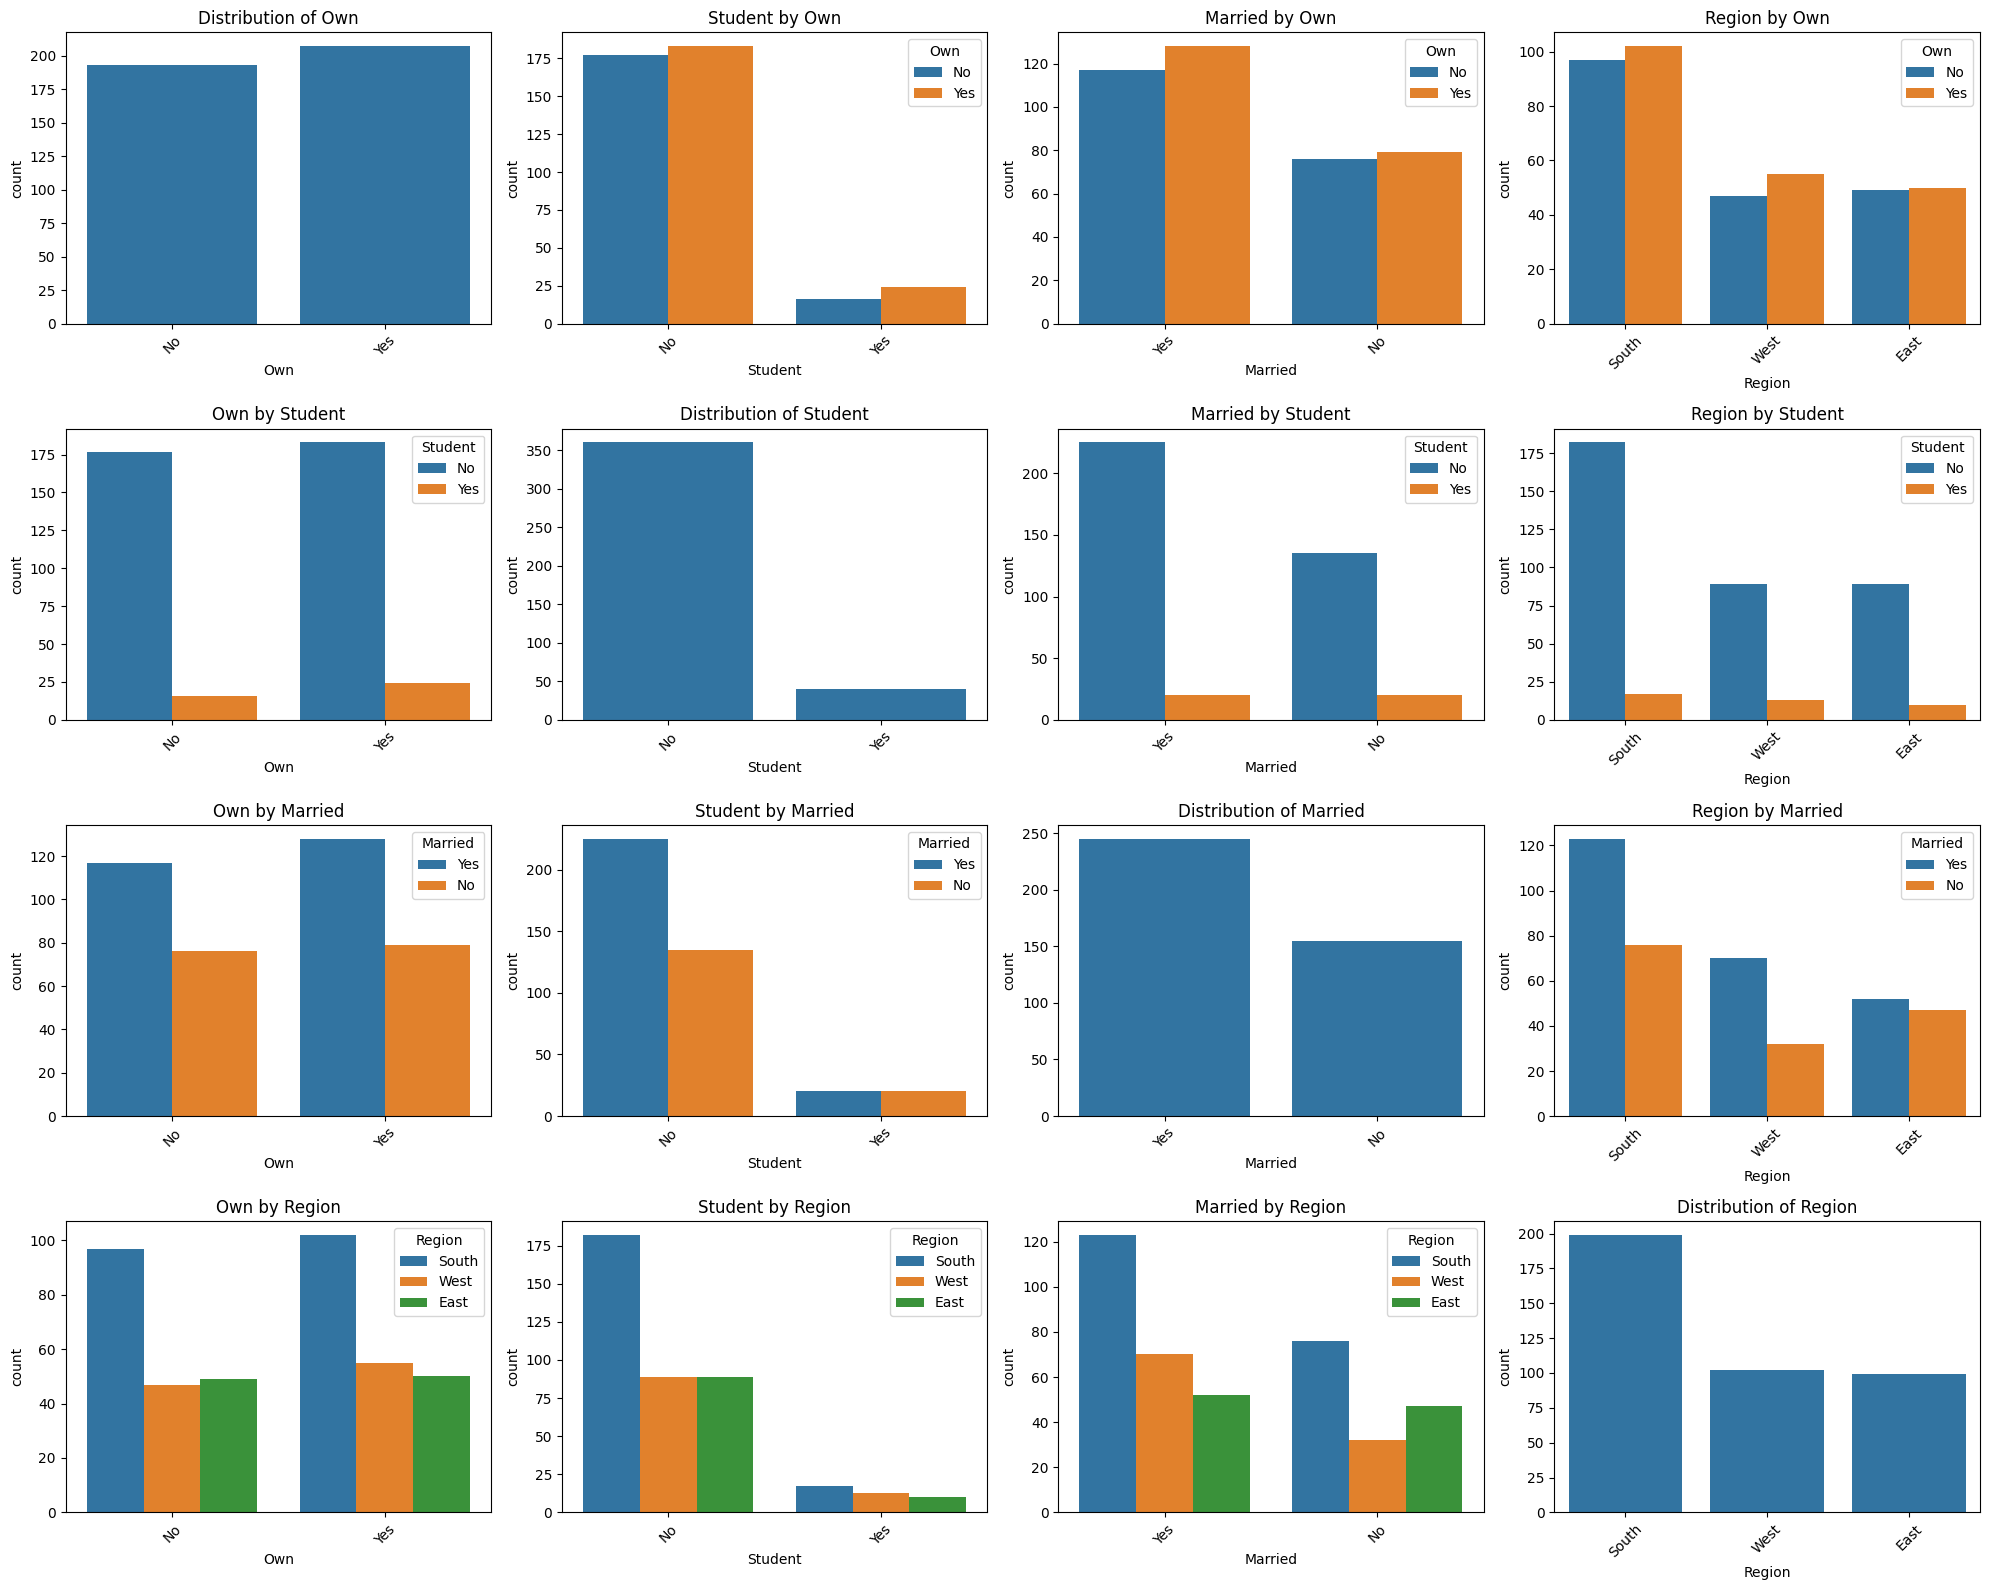

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Determine the number of categorical columns
n_categorical = len(categorical_cols)

# Create a grid of subplots
fig, axes = plt.subplots(n_categorical, n_categorical, figsize=(n_categorical * 5, n_categorical * 4)) # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate bar plots for each pair of categorical variables
for i in range(n_categorical):
    for j in range(n_categorical):
        if i == j:
            # Plot a countplot for a single variable on the diagonal
            sns.countplot(data=df, x=categorical_cols[i], ax=axes[i * n_categorical + j])
            axes[i * n_categorical + j].set_title(f'Distribution of {categorical_cols[i]}')
            axes[i * n_categorical + j].tick_params(axis='x', rotation=45)
        else:
            # Plot a countplot for pairs of variables
            sns.countplot(data=df, x=categorical_cols[j], hue=categorical_cols[i], ax=axes[i * n_categorical + j])
            axes[i * n_categorical + j].set_title(f'{categorical_cols[j]} by {categorical_cols[i]}')
            axes[i * n_categorical + j].tick_params(axis='x', rotation=45)
            axes[i * n_categorical + j].legend(title=categorical_cols[i])


plt.tight_layout()
plt.show()

Algunos de los datos curiosos que se pueden extraer de las gráficas de barras son:

- La mitad de las personas estudiantes son casadas.
- A pesar de que la región con mayores instancias es el sur, su número de personas estudiantes no son mucho mayores a las otras regiones. Puede que en esta región el nivel educativo sea bajo.
- En todas las regiones predominan las personas solteras.
- La mayoría de personas no son estudiantes y son de la región sur.

# 4-) Pipelines preprocesamiento #

### Imputación y escalado de variables numéricas.

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


numerical_pipe = Pipeline([('imputer',SimpleImputer()), ('scaler', StandardScaler())])

numerical_pipe

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

### Aplicar técnicas de imputación y codificación numérica a las variables categóricas

In [61]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

nominal_inputer = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('one-hot', OneHotEncoder())])

nominal_inputer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('one-hot', OneHotEncoder())])

### Implementar el preprocesamiento de los datos mediante el uso de pipelines.


In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numerical_pipe = Pipeline([('imputer',SimpleImputer()), ('scaler', StandardScaler())])

nominal_inputer = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('one-hot', OneHotEncoder())])

preprocessor = ColumnTransformer([('numerical', numerical_pipe, ['Income', 'Limit', 'Rating']), ('nominal', nominal_inputer, ['Own', 'Student', 'Married', 'Region']),])

# 5-) Agregar pipeline de preprocesamiento al estimador #

### Aplicar el modelo de regresión lineal mediante el uso de pipelines para integrar el preprocesamiento y el entrenamiento de forma estructurada y reproducible.


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([('preprocessor', preprocessor), ('model', LinearRegression())])

model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Limit',
                                                   'Rating']),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder())]),
                                                  ['Own', 'Student', 'Married',
                                                   'Region'])])),
                ('model', LinearRegression())])

# 6-) Datos de entrenamiento y prueba #

Se seleccionan las variables numéricas de entrenamiento que presentan mayor correlación con la variable objetivo (Balance), correspondiente al saldo promedio en la tarjeta de crédito. Las variables identificadas fueron Income, Limit y Rating, según lo evidenciado en la matriz y gráfica de correlación.

Posteriormente, se realiza la partición del conjunto de datos, asignando el 80 % para entrenamiento y el 20 % restante para prueba, con el fin de evaluar el desempeño del modelo de regresión lineal.


In [64]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[['Income', 'Limit', 'Rating']]
y = df['Balance']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Proporciones de datos de entrenamiento y prueba.



# 7-) Entrenar modelo #

### Se procede al entrenamiento del modelo utilizando el conjunto de datos de entrenamiento previamente definido.

In [65]:
model = LinearRegression()
model.fit(X_train, y_train) # Entrena el modelo
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (320, 3) (320,)
Testing set shape: (80, 3) (80,)


# 8-) Evaluar modelo

### Se evalúa el modelo mediante el análisis del coeficiente de varianza, con el objetivo de identificar posibles problemas de sesgo y varianza en el ajuste.

In [66]:
# Evaluate the model on the training set
train_score = model.score(X_train, y_train)
print(f"Model R^2 score on the training set: {train_score}")

# Evaluate the model on the test set
test_score = model.score(X_test, y_test)
print(f"Model R^2 score on the test set: {test_score}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the predictions
# print("\nPredictions on the test set:")
# display(y_pred)

Model R^2 score on the training set: 0.8856848097709196
Model R^2 score on the test set: 0.8246919621382616


# 9-) Identifique las variables que más contribuyen al modelo

In [67]:
print(f' Los coeficientes son : {model.coef_}')
print(f' El intercepto es : {model.intercept_}')

 Los coeficientes son : [-7.47736316  0.1038337   2.36003086]
 El intercepto es : -469.93629705609385


Las variables que más contribuyen al modelo de regresión lineal son Income y Rating, con coeficientes de -7.48 y 2.36, respectivamente. Aunque la variable Limit presenta una menor influencia, su coeficiente de 0.10 indica que su aporte al modelo no es despreciable.


# 10-) Conclusión sobre el modelo

El modelo presenta bajo sesgo (88.57 %) y baja varianza (82.47 %), según los valores obtenidos del coeficiente de varianza, tanto para el ajuste del modelo como para sus predicciones. Estos resultados sugieren una buena capacidad de generalización, con un equilibrio adecuado entre precisión y estabilidad.